In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
visitors = pd.read_csv('data/2019_2022_Visitors.csv')
states_gdp_2019_2021 = pd.read_csv('data/All_States_2012_2021.csv')
value_gdp_2022 = pd.read_csv('data/Value_Added_Activities_2022.csv')

In [3]:
visitors.head()

,Year,State,Park,RecV,RecV_Days,NonRec_Visits,RecVist_Hours,NonRecVist_Hours
0,2017,Alabama,Horseshoe Bend NMP,74255.0,15009.0,1014144.0,180109.0,338014.0
1,2017,Alabama,Little River Canyon NPRES,367058.0,80380.0,0.0,964562.0,0.0
2,2017,Alabama,Natchez Trace PKWY,442825.0,148659.0,613012.0,1783918.0,613012.0
3,2017,Alabama,Russell Cave NM,24377.0,3243.0,0.0,38927.0,0.0
4,2017,Alabama,Tuskegee Airmen NHS,39322.0,4915.0,0.0,58982.0,0.0


In [4]:
states_gdp_2019_2021.head()

,State,Description,Description Clean,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alabama,Total Outdoor Recreation,Total Outdoor Recreation,3807374,3886358,3881184,3987073,4085363,4226937,4450364,4605097,4166573,5028892
1,Alabama,Total Core Outdoor Recreation,Total Core Outdoor Recreation,2065590,2139978,2142642,2205932,2253928,2350128,2425391,2504979,2496455,2776879
2,Alabama,Conventional Outdoor Recreation,Conventional Outdoor Recreation,1422123,1474936,1475274,1534439,1582240,1662153,1666901,1703414,1832269,2001314
3,Alabama,Bicycling,Bicycling,12660,13251,13137,13049,13048,14170,13435,14073,17276,19091
4,Alabama,Boating/Fishing,Boating/Fishing,215849,217589,222706,238993,269961,296761,305603,326285,490274,405721


In [5]:
value_gdp_2022.head()

,State,Total outdoor recreation activities,Conventional outdoor recreation activities,Boating / fishing,RVing,Snow activities,Other outdoor recreation activities,Game areas (including golf and tennis),All other supporting outdoor recreation,Government expenditures
0,Alabama,"5,516,856","2,254,158","404,424","490,057","21,078","880,178","245,325","2,252,297","130,224"
1,Alaska,"2,610,538","417,107","101,653","97,544","26,818","336,722","14,120","1,822,592","34,117"
2,Arizona,"11,703,617","3,724,990","372,793","947,008","54,855","2,063,966","587,171","5,604,789","309,871"
3,Arkansas,"4,114,256","1,770,538","452,703","278,564","21,363","608,988","170,397","1,660,381","74,349"
4,California,"73,827,997","22,012,853","2,414,941","3,401,786","688,228","15,883,873","2,670,339","30,823,356","5,107,914"


In [6]:
visitors.sort_values(by=['RecV'], ascending=False).head(5)

,Year,State,Park,RecV,RecV_Days,NonRec_Visits,RecVist_Hours,NonRecVist_Hours
2088,2022,California,Golden Gate NRA,15638911.0,3431378.0,0.0,41176537.0,0.0
460,2018,California,Golden Gate NRA,15223697.0,3348107.0,0.0,40177286.0,0.0
863,2019,California,Golden Gate NRA,15002227.0,3263814.0,0.0,39165776.0,0.0
57,2017,California,Golden Gate NRA,14981897.0,2071988.0,0.0,24863862.0,0.0
1675,2021,California,Golden Gate NRA,13712614.0,3121951.0,0.0,37463422.0,0.0


In [7]:
byyear = visitors.groupby(['Year']).sum(['RecV'])

In [8]:
byyear

,RecV,RecV_Days,NonRec_Visits,RecVist_Hours,NonRecVist_Hours
Year,,,,,
2017,330882772.0,120580704.0,172112734.0,1.446971e+09,94678396.0
2018,318211832.0,116784834.0,170330752.0,1.401420e+09,92456495.0
2019,327516623.0,119163976.0,169448644.0,1.429970e+09,92910271.0
2020,237064318.0,87912527.0,148436337.0,1.054953e+09,80268799.0
2021,297115401.0,113054626.0,158074682.0,1.356658e+09,86643416.0
2022,311986008.0,113245394.0,162749152.0,1.358947e+09,86933431.0


C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='RecV'>

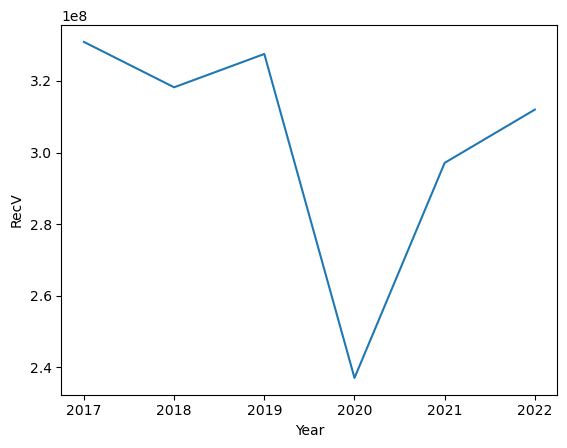

In [9]:
sns.lineplot(data=byyear, x="Year", y="RecV")

In [10]:
bystatebyyear = visitors.groupby(['Year','State']).sum(['RecV'])

In [11]:
bystatebyyear

RecV   RecV_Days  NonRec_Visits  RecVist_Hours  \
Year State                                                                  
2017 Alabama           968244.0    255361.0      1627156.0      3064363.0   
     Alaska           2786065.0   2033811.0       818545.0     24405823.0   
     American Samoa     69468.0     11577.0            0.0       138934.0   
     Arizona         13770402.0  10962941.0      4703411.0    131555392.0   
     Arkansas         3512692.0    983177.0      2455528.0     11798159.0   
...                         ...         ...            ...            ...   
2022 Virginia        22507068.0   6725402.0     37705223.0     80704912.0   
     Washington       8043387.0   3892650.0      1449399.0     46711858.0   
     West Virginia    2178154.0    567052.0         2400.0      6804647.0   
     Wisconsin         671838.0    394418.0            0.0      4733026.0   
     Wyoming          6148010.0   5703852.0      2864782.0     68446275.0   

                     NonRecVist_Hours  
Year State                             
2017 Alabama                 951026.0  
     Alaska                  494725.0  
     American Samoa               0.0  
     Arizona                4266686.0  
     Arkansas                491105.0  
...                               ...  
2022 Virginia              18235154.0  
     Washington             1000049.0  
     West Virginia             4800.0  
     Wisconsin                    0.0  
     Wyoming                2205883.0  

[324 rows x 5 columns]

C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


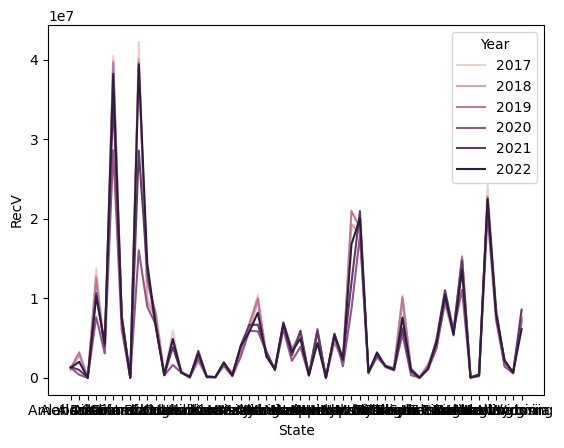

In [12]:
state_year = sns.lineplot(data=bystatebyyear, x="State", y="RecV", hue="Year")

C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


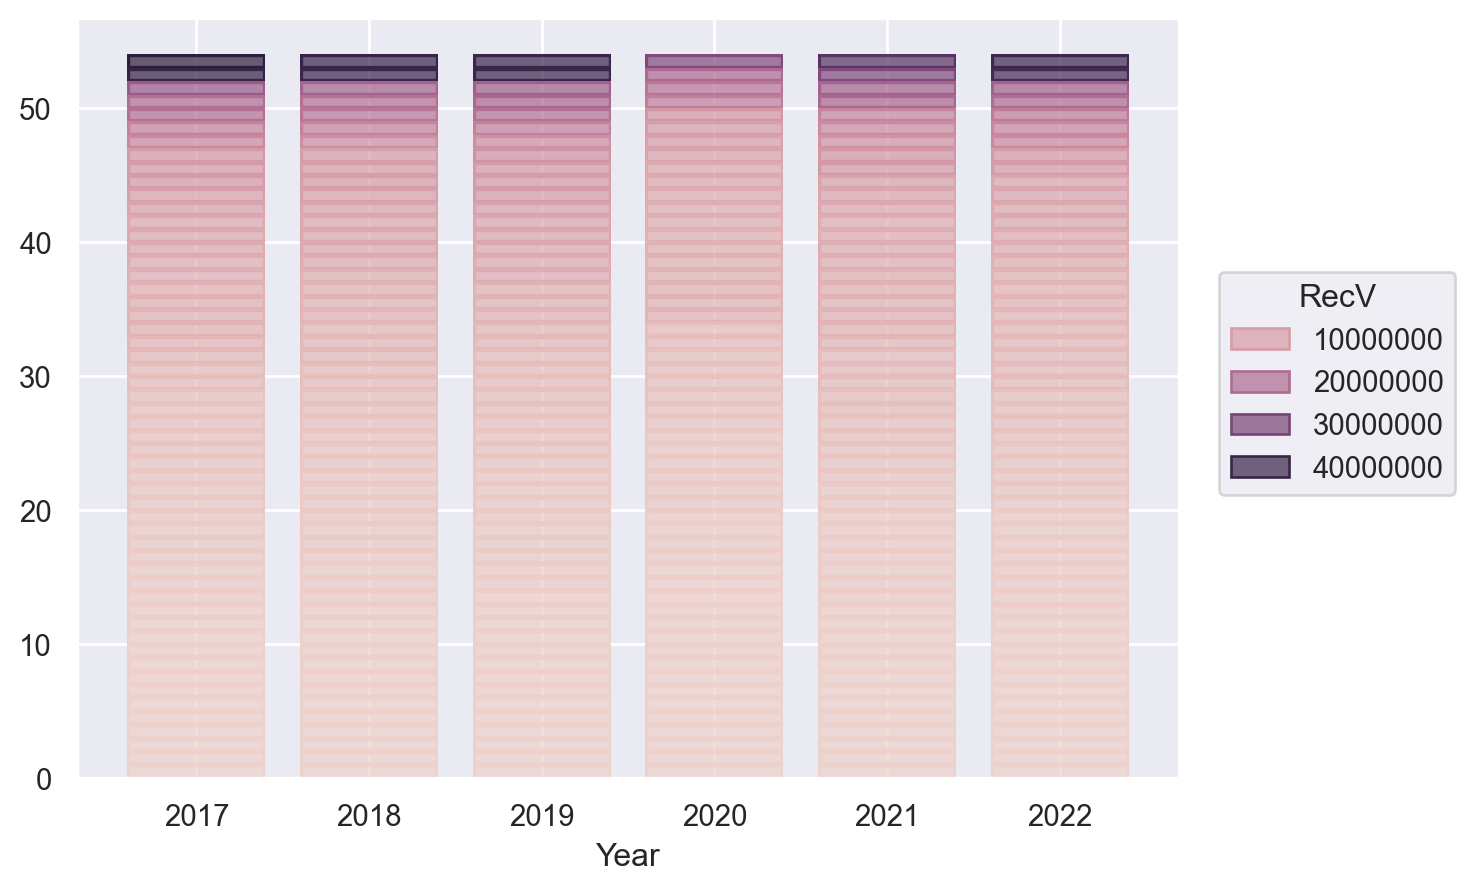

In [13]:
so.Plot(bystatebyyear, x="Year", color="RecV").add(so.Bar(), so.Count(), so.Stack())

In [14]:
popstate = visitors.groupby(['State']).sum(['RecV']).reset_index().sort_values(by=['RecV'], ascending=False)

In [15]:
popstate

,State,Year,RecV,RecV_Days,NonRec_Visits,RecVist_Hours,NonRecVist_Hours
5,California,315042,222008930.0,106321326.0,2847671.0,1.275857e+09,25240653.0
8,District of Columbia,252446,206199455.0,11786600.0,110601657.0,1.414398e+08,51654493.0
49,Virginia,230223,134512727.0,39252601.0,222307190.0,4.710318e+08,107988615.0
34,North Carolina,109053,115002635.0,57782490.0,32366590.0,6.933902e+08,7239376.0
33,New York,266574,97038432.0,19416217.0,7656416.0,2.329953e+08,14379608.0
46,Utah,157521,85006649.0,44690969.0,3619215.0,5.362920e+08,2290823.0
9,Florida,133287,68759015.0,15060087.0,116942.0,1.807214e+08,359131.0
3,Arizona,254457,67701810.0,53633584.0,27572568.0,6.436037e+08,19703399.0
44,Tennessee,121170,59677303.0,30331224.0,73819069.0,3.639750e+08,38625799.0
22,Massachusetts,163584,50901286.0,6396581.0,659687.0,7.675944e+07,1146281.0


In [16]:
popstate.to_csv("popular_state.csv")

C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


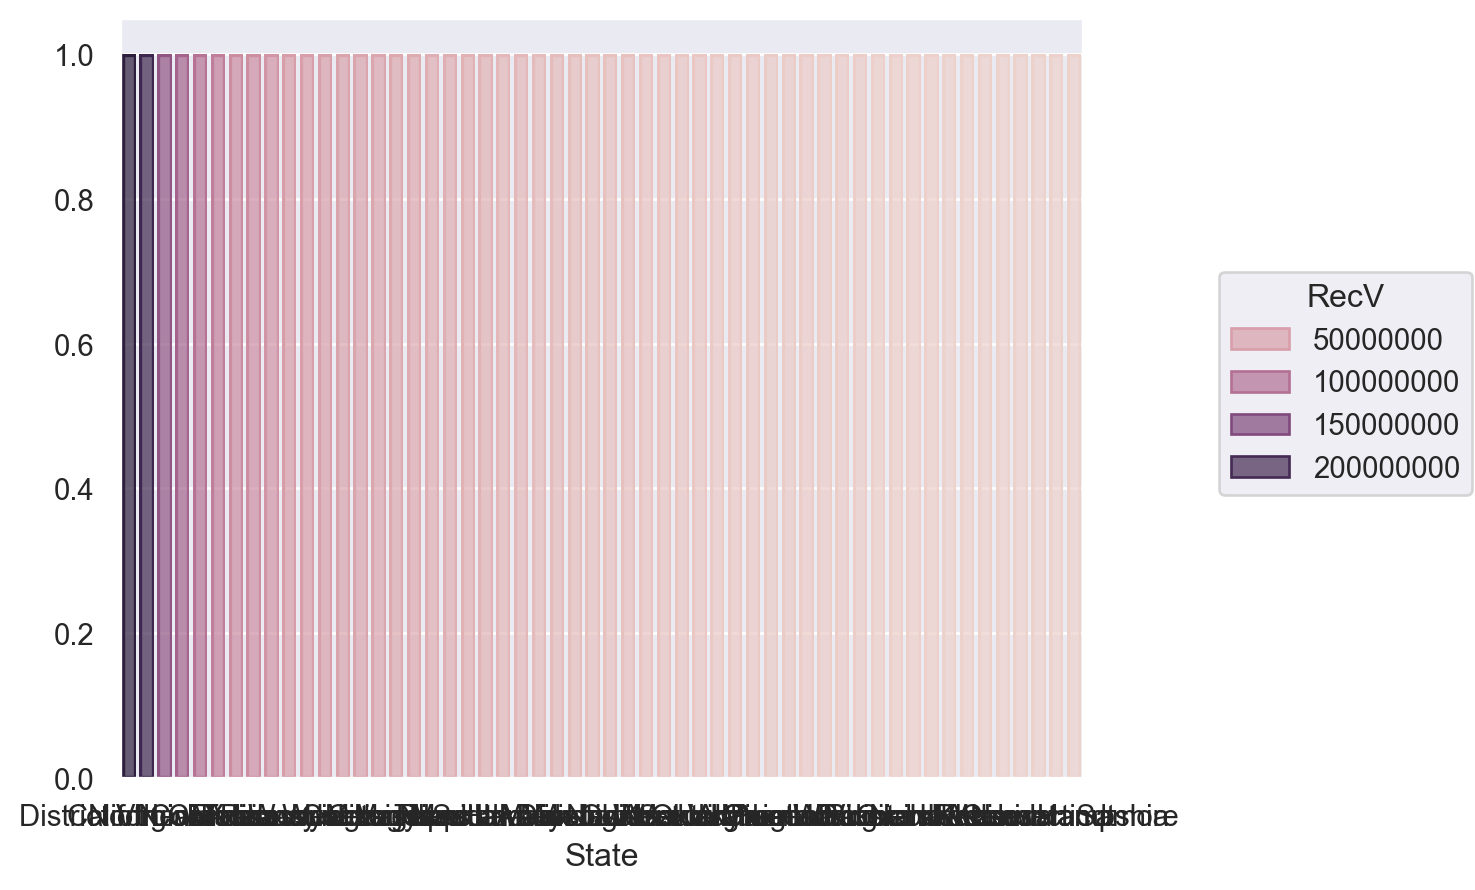

In [17]:
so.Plot(popstate, x="State", color="RecV").add(so.Bar(), so.Count(), so.Stack())